In [77]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
df = pd.read_csv("global temp.csv", parse_dates=["Year"])

In [79]:
df["Year"] = pd.to_datetime(df.Year, format="%Y")
data = df.drop(["Year"], axis=1)
data.index = df.Year

In [80]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
coint_johansen(data.drop("Value", axis=1), -1, 1).eig

array([4.27332804e-05])

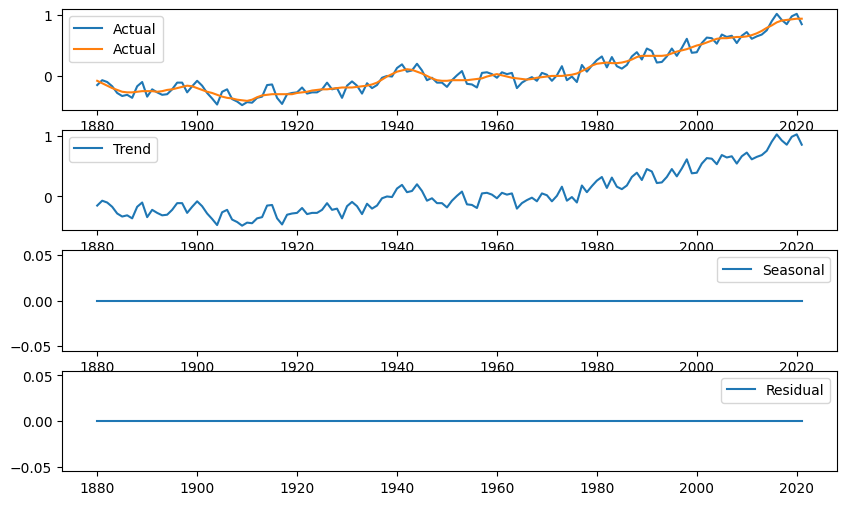

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decom=seasonal_decompose(data["Value"])
dftend=decom.trend
dfsea=decom.seasonal
dfres=decom.resid
plt.figure(figsize=(10,6))
plt.subplot (411)
plt.plot(data,label='Actual')
plt.legend()
plt.subplot (412)
plt.plot(dftend,label='Trend')
plt.legend()
plt.subplot (413)
plt.plot(dfsea,label='Seasonal')
plt.legend()
plt.subplot(414)
plt.plot(dfres, label='Residual')
plt.legend()

In [82]:
from pmdarima.arima import auto_arima

model = auto_arima(data["Value"], seasonal=True, information_criterion="aic")

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  142
Model:               SARIMAX(1, 1, 3)   Log Likelihood                 125.173
Date:                Sat, 17 Dec 2022   AIC                           -238.347
Time:                        06:35:17   BIC                           -220.654
Sample:                    01-01-1880   HQIC                          -231.157
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0150      0.007      2.297      0.022       0.002       0.028
ar.L1         -0.9353      0.068    -13.689      0.000      -1.069      -0.801
ma.L1          0.6404      0.106      6.032      0.000       0.432       0.849
ma.L2         -0.5499      0.091     -6.016      0.000      -0.729      -0.371
ma.L3         -0.3365      0.086     -3.892      0.000      -0.506      -0.167
sigma2         0.0099      0.002      6.446      0.000       0.007       0.013
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 3.78
Prob(Q):                              0.83   Prob(JB):                         0.15
Heteroskedasticity (H):               1.19   Skew:                            -0.06
Prob(H) (two-sided):                  0.56   Kurtosis:                         2.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [86]:
size = int(len(data) * 0.75)

Xtrain, Xtest = data[0:size], data[size:]

In [87]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(Xtrain["Value"], order=(1, 1, 3))
result = model.fit()

testprid = pd.DataFrame(result.predict(start=len(Xtrain), end=len(data)))
testprid.columns = ['Prediction']

data = pd.concat((data, testprid), axis=1)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.76353D-01    |proj g|=  4.64515D-01

At iterate    5    f= -8.77179D-01    |proj g|=  2.56401D-01

At iterate   10    f= -8.85653D-01    |proj g|=  3.97527D-01

At iterate   15    f= -8.86644D-01    |proj g|=  3.27833D-01

At iterate   20    f= -8.96571D-01    |proj g|=  6.62357D-02

At iterate   25    f= -9.00936D-01    |proj g|=  7.19595D-02

At iterate   30    f= -9.01182D-01    |proj g|=  6.02065D-03

At iterate   35    f= -9.02187D-01    |proj g|=  5.16105D-01

At iterate   40    f= -9.04110D-01    |proj g|=  6.05293D-02

At iterate   45    f= -9.04195D-01    |proj g|=  1.08571D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


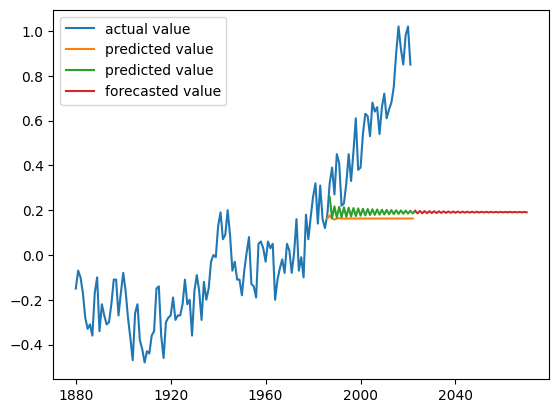

In [88]:
yhat = result.predict(start="2022-03-01", end="2070-01-01")

plt.plot(data.index, data["Value"], label="actual value")
plt.plot(data.index, data["Prediction"], label="predicted value")
plt.plot(pd.DataFrame(yhat), label="forecasted value")

plt.legend()